In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video
from IPython.display import Image
import matplotlib.cm as cm 
import scipy
import cmath

<font size="5">**Punto 1**.</font>


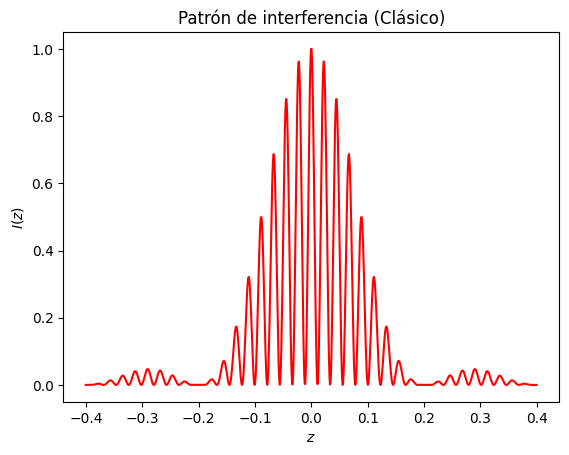

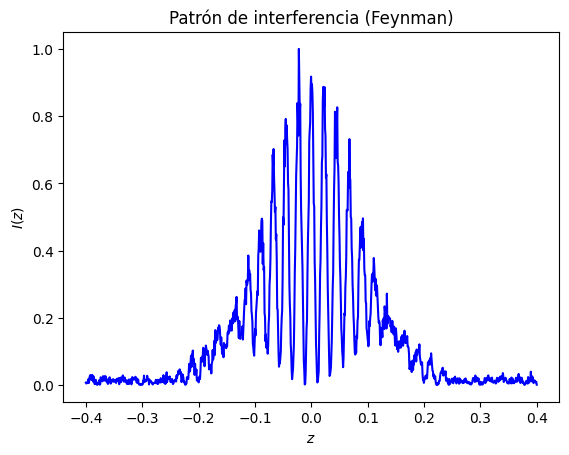

In [2]:
A = 0.1 #cm
long_onda = 670e-7 #cm
D1 = 30 #cm
D2 = 30 #cm
a = 0.01 #cm
d = 0.09 #cm
signo = np.array([-1,1])
N = 10000

def intensities_classical(z):
    theta = np.arctan2(z,D2)
    term1 = (np.cos((np.pi*d/long_onda)*np.sin(theta)))**2
    term2 = (np.sinc((a/long_onda)*np.sin(theta)))**2
    return term1*term2

def intensities_feynman(x,y,z):
    term1 = np.exp(2j * np.pi / long_onda * (D1 + D2))
    term2 = np.exp(np.pi * 1j / (long_onda * D1) * (x - y*np.random.choice(signo, N))**2)
    term3 = np.exp(np.pi * 1j / (long_onda * D1) * (z - y*np.random.choice(signo, N))**2)
    return np.mean(term1 * term2 * term3)

z = np.linspace(-0.4, 0.4, 1000)

p1 = np.zeros(len(z))
p2 = np.zeros(len(z))

for i in range(len(z)):
    x = np.random.uniform(-A/2, A/2, size=N)
    y = np.random.uniform(d/2-a/2, d/2+a/2, size=N)
    p1[i] = intensities_classical(z[i])
    p2[i] = np.absolute(intensities_feynman(x,y,z[i]))**2
    
p1 = p1/p1[np.argmax(p1)]
p2 = p2/p2[np.argmax(p2)]
plt.plot(z, p1, c="r")
plt.title("Patrón de interferencia (Clásico)")
plt.ylabel(r"$I(z)$")
plt.xlabel(r"$z$")
plt.show()
plt.plot(z, p2, c="b")
plt.title("Patrón de interferencia (Feynman)")
plt.ylabel(r"$I(z)$")
plt.xlabel(r"$z$")
plt.show()
#Falta el bono

Interpretar resultados #1

<font size="5">**Punto 2**.</font>

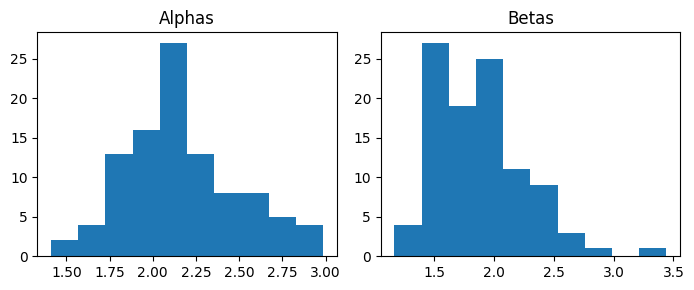

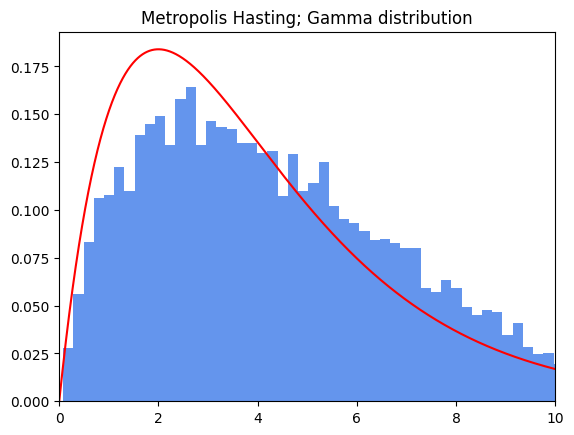

In [3]:
N = 10000
alpha = 2
beta = 2

#Listas
rang = np.linspace(0,10,N)
stats = np.zeros(N)
for n in range(N):
    stats[n] = scipy.stats.gamma(alpha,scale=beta).pdf(rang[n])

#Gamma
def gamma(x,alpha,beta):
    return x**(alpha-1)*np.exp(-x/beta)

#Metrópolis
def metropolis():
    muestras = np.zeros(N)
    x0 = 0.1
    fx0 = gamma(x0,alpha,beta)
    for i in range(N):
        nw_x = x0 + np.random.normal(0, 0.5)
        nw_fx = gamma(nw_x,alpha,beta)    
        accept = nw_fx/fx0
        u = np.random.rand()
        if u <= accept:
            muestras[i] = nw_x
            x0 = nw_x
            fx0 = nw_fx
        else:
            muestras[i] = x0
    return muestras

many_alphas = np.zeros(100)
many_betas = np.zeros(100)
for k in range(100):
    muestras = metropolis()
    jajaj = scipy.stats.gamma.fit(muestras)
    many_alphas[k] = jajaj[0]
    many_betas[k] = jajaj[2] 
    plt.close()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3))
ax1.hist(many_alphas)
ax1.set_title("Alphas")
ax2.hist(many_betas)
ax2.set_title("Betas")
plt.tight_layout()
plt.show()
plt.close()
plt.figure()
plt.title("Metropolis Hasting; Gamma distribution")
plt.hist(muestras, density=True, bins=100, color="cornflowerblue")
plt.plot(rang, stats, c="r")
plt.xlim(left=0,right=10)
plt.show()

#Falta Responder preguntas

<font size="5">**Punto 3**.</font>

In [4]:
#Parámtros
N = 150
J = 0.2
beta = 10

#Energia
def energy_cross(matriz, i, j):
    e = 0
    for h in range(-1,2):  
        e += matriz[(i+h)%N,j]*matriz[(i+1+h)%N,j] + matriz[(i+h)%N,j]*matriz[(i+h)%N,(j+1)%N] + matriz[(i+h)%N,j]*matriz[(i-1+h)%N,j] + matriz[(i+h)%N,j]*matriz[(i+h)%N,(j-1)%N]
    for p in range(-1,2):
        e += matriz[i,(j+p)%N]*matriz[(i+1)%N,(j+p)%N] + matriz[i,(j+p)%N]*matriz[i,(j+1+p)%N] + matriz[i,(j+p)%N]*matriz[(i-1)%N,(j+p)%N] + matriz[i,(j+p)%N]*matriz[i,(j-1+p)%N]
    return e

matriz = np.random.choice([-1, 1], size=(N, N))
matrices = []
contador = 1
for k in range(400000):
    if k%500 == 0:
        plt.imshow(matriz)
        nombre_archivo = f"frames/{contador+1:03}.png"  
        plt.savefig(nombre_archivo) 
        plt.close() 
        contador+=1   
    rand_index = tuple(np.random.randint(0,N,size=2))
    E0 = energy_cross(matriz, rand_index[0], rand_index[1])
    matriz[rand_index] = matriz[rand_index]*-1  
    E1 = energy_cross(matriz, rand_index[0], rand_index[1])
    diff = -J*(E1-E0)
    if diff > 0:
        u = np.random.rand()
        if u > np.exp(-beta*diff):
            matriz[rand_index] = matriz[rand_index]*-1

# Consola: ffmpeg -framerate 60 -i frames/%03d.png -c:v libx264 -pix_fmt yuv420p video.mp4

In [5]:
Video("video.mp4")

<font size="5">**Punto 4**.</font>

In [160]:
# Leer el archivo de texto de Proyecto Gutenberg
with open('larepublica.txt', 'r', encoding='utf-8') as file:
    s = file.read()

import re
s = re.sub(r"\n{3,}","#",s)
s = re.sub(r"\n","",s)
s = s.replace("#","\n")

s = re.sub(r'[0-9=+\'"‘’*/ñ/]', '', s)

# Convertir todo el texto a minúsculas
s = s.lower()

inicio_idx = s.find("i went down yesterday")
fin_idx = s.find(" end of the project gutenberg ebook the republic ")

if inicio_idx != -1 and fin_idx != -1:
    s = s[inicio_idx:fin_idx]

# Guardar el texto limpio en una variable
texto_limpio = s
caracteres=np.unique(list(texto_limpio))
type(caracteres)

#Ahora vamos a crear nuestros n-gramas
def ngramas (n,texto):
    n_gramas = []
    for i in range(len(texto) - n + 1):
        n_grama = texto[i:i + n]
        n_gramas.append(n_grama)
    return n_gramas
n_gramas=ngramas(3,texto_limpio)
n_gramas=np.array(n_gramas)

n_gramas_unicos = []  # Lista para almacenar n-gramas únicos
for n_grama in n_gramas:
    if n_grama not in n_gramas_unicos:  
        n_gramas_unicos.append(n_grama)  
n_gramas_unicos=np.array(n_gramas_unicos)
#Creemos nuestra matriz
matriz=np.zeros((len(n_gramas_unicos)+1,len(caracteres)+1), dtype=object) #Voy a crear una matriz como el dataframe solo que la esquina izquierda de arriba es cero
hola=np.concatenate((np.array([0]),caracteres))
matriz[0]=hola

for i in range(len(n_gramas_unicos)):
    matriz[i+1][0]=n_gramas_unicos[i] #Hasta acá generamos este dataframe raro en numpy (nunca aprendí pandas)

#Ahora vamos a rellenar la matriz. Recorremos el texto de n-grama en n-grama y vemos el carácter siguiente. 
#Contamos las iteraciones de cada carácter para cada n-grama y así rellenamos la matriz

for i in range(len(texto_limpio) - 3):  # Iterar hasta el penúltimo n-grama
    n_grama_actual = texto_limpio[i:i + 3]  # Extraer el n-grama actual
    siguiente_caracter = texto_limpio[i + 3] if i + 3 < len(texto_limpio) else None  # Obtener el siguiente carácter

    if siguiente_caracter in caracteres:
        # Encontrar índices
        n_grama_index = np.where(n_gramas_unicos == n_grama_actual)[0][0] +1  # +1 para omitir la fila de n-gramas
        
        caracter_index = np.where(caracteres == siguiente_caracter)[0][0] +1 # +1 para omitir la columna de caracteres

        # Incrementar el conteo en la matriz
        matriz[n_grama_index][caracter_index] += 1

#Listo, ahora vamos a hallar probabilidades
matriz_probabilidades = np.zeros_like(matriz, dtype=float)
for i in range(1,matriz.shape[0]):
    fila = matriz[i]
    
    # Sumar los elementos de la fila, omitiendo el primer elemento
    suma_fila = np.sum(fila[1:])  # Omitir el primer elemento que es un str
    print(suma_fila)
    # Verificar que la suma no sea cero
    if suma_fila > 0:
        # Dividir cada elemento de la fila (excepto el primer) por la suma
        matriz_probabilidades[i, 1:] = fila[1:] / suma_fila
    else:
        # Si la suma es cero, podemos dejar la fila como ceros
        matriz_probabilidades[i, 1:] = 0

#Me di cuenta de que esta cosa no genera bien los ngramas únicos y no sé por qué. Lo siguiente sería con matriz
#de probabilidades y np.choice ir generando un texto pero eso puede fallar por que la matriz quedó rara y no sé por qué.



'sss'